In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import trompy as tp
import csv
from datetime import datetime, timedelta


# the next two lines will expand the printed tables
pd.options.display.max_rows= 40000
pd.options.display.max_columns= 40000


ctl_color= "gray"
exp_color="deepskyblue"
fig_folder=r"../plots\\"
READ_METAFILE= pd.read_excel(r"../FEDProtein_METAFILE.xls" ,sheet_name="METAFILE" )

READ_METAFILE


,fedfile,mouse,diet,mode,sex,order
0,FED001_042322_00.CSV,FEDXA01,GRAIN,FF,M,2
1,FED001_042622_00.CSV,FEDXA01,PR,FF,M,2
2,FED001_050322_00.CSV,FEDXA01,NR,FF,M,2
3,FED001_051022_04.CSV,FEDXA01,NR,FR1,M,2
4,FED001_051122_01.CSV,FEDXA01,NR,FR1R,M,2
5,FED001_051522_00.CSV,FEDXA01,PR,ECO,M,2
6,FED002_051522_00.CSV,FEDXA01,RICH,ECO,M,2
7,FED002_042322_00.CSV,FEDXA02,GRAIN,FF,M,2
8,FED002_042622_00.CSV,FEDXA02,PR,FF,M,2
9,FED002_050322_00.CSV,FEDXA02,NR,FF,M,2


In [18]:
metafile_path = r"../FEDProtein_METAFILE.xls"
rows, header = tp.metafilereader(metafile_path, sheetname="METAFILE")

def get_FEDevents(filename, eventname):
    formats = ["%Y-%m-%d %H:%M:%S", "%m/%d/%Y %H:%M:%S"]  # Updated date formats
    file = open(filename)
    csvreader = csv.reader(file)
    next(csvreader)  # Skip header
    rows = [row for row in csvreader]

    if not rows:  # Check if rows is empty
        print(f"No data in file {filename}.")
        return []

    # Assuming the first column contains the date and time info
    # and the "Event" column is consistent with the provided files
    event_column_index = 7  # Based on your CSV structure

    timestamps = []
    for row in rows:
        if row[event_column_index] == eventname:
            for date_format in formats:
                try:
                    date_time_obj = datetime.strptime(row[0], date_format)
                    timestamps.append(date_time_obj)
                    break
                except ValueError:
                    pass

    if not timestamps:  # If no events match, return an empty list
        return []

    # Calculate time since "lights on", using the first event as reference if needed
    t0 = timestamps[0].strftime(date_format)
    day = t0.split()[0]
    lightson = day + " 07:00:00"  # Assuming lights on at 7 AM
    refpoint = datetime.strptime(lightson, date_format)

    pellettimes = [(t - refpoint).total_seconds() / 3600 for t in timestamps]

    return pellettimes

# Initialize a dictionary to hold lists for each unique group
grouped_lists = {}

# Iterate through the rows to process and group data
for row in rows:
    mouse_id = row[1]
    sex = row[4]  # Assuming this is the correct column for SEX
    diet = row[2]  # Assuming this is the correct column for DIET
    mode = row[3]
    order = row[5]
    filename = f"../data/{row[0]}"

    # Create a unique key for each group
    group_key = f"{sex}_{diet}_{order}_{mode}"
    
    # Collect timestamps for this row's file and pellet event
    timestamps = get_FEDevents(filename, "Pellet")
    pellet_count = len(timestamps)
    
    # Initialize the list for this group if it doesn't exist
    if group_key not in grouped_lists:
        grouped_lists[group_key] = []
    
    # Append the data for this mouse to the list for its group
    grouped_lists[group_key].append({
        "MOUSEID": mouse_id,
        "SEX": sex,
        "DIET": diet,
        "ORDER": order,
        "diet": diet,
        "COUNT": pellet_count
    })



In [10]:
len(timestamps)

1337

In [19]:
def get_all_meals(pellettimes, meal_threshold=5/60, min_pellets_for_meal=2):
    if not pellettimes:
        return (0, 0, 0, 0, 0, 0, [0]*24)

    IPIs = np.diff(np.array(pellettimes))
    meals = []
    snacks = []
    current_event = [pellettimes[0]]

    for i, ipi in enumerate(IPIs):
        if ipi <= meal_threshold:
            current_event.append(pellettimes[i + 1])
        else:
            if len(current_event) >= min_pellets_for_meal:
                meals.append(current_event)
            else:
                snacks.append(current_event)
            current_event = [pellettimes[i + 1]]

    # Handle the last sequence
    if current_event:
        if len(current_event) >= min_pellets_for_meal:
            meals.append(current_event)
        else:
            snacks.append(current_event)

    # nmeals = len(meals)
    # nsnacks = len(snacks)
    
    # hourly_meals = np.zeros(24)
    # for meal in meals:
    #     start_hour = int(meal[0]) % 24
    #     hourly_meals[start_hour] += 1

    # total_pellets = len(pellettimes)
    # mealsize = sum(len(meal) for meal in meals) / nmeals if nmeals else 0
    # snack_size = sum(len(snack) for snack in snacks) / nsnacks if nsnacks else total_pellets / nsnacks if nsnacks else 0
    # total_observation_period = max(pellettimes) - min(pellettimes)
    # meal_frequency = nmeals / total_observation_period if total_observation_period > 0 else 0
    # snack_frequency = nsnacks / total_observation_period if total_observation_period > 0 else 0

    return meals, snacks



# filename= r"C:\Users\hta031\Github\FEDProtein\data\FED009_050322_00.CSV"

all_meals= []
all_snacks= []

mouse_id = row[1]
    if row[5] == 1 and row[3] == "FF" and row[2] == "NR":
        filename = f"../data/{row[0]}"

        pellettimes, refpoint = get_FEDevents(filename, "Pellet")
        
        meals,snacks = get_all_meals(pellettimes)
        all_meals.append(meals)
        all_snacks.append(snacks)
all_meals= tp.flatten_list(all_meals)
all_snacks= tp.flatten_list(all_snacks)






meal_size = [len(meal) for meal in all_meals]
snack_size = [len(snack) for snack in all_snacks]
meal_size
print(snack_size)
# plot the meals and snacks 
f , ax  = plt.subplots(1,figsize=(10,5))
ax.hist(meal_size, bins=range(0, 20), color='blue', alpha=0.5, label='Meals')
ax.hist(snack_size, bins=range(0, 20), color='red', alpha=0.5, label='Snacks')
ax.legend()

# get the average of snack_size
np.mean(snack_size)
len(meal_size)
np.mean(meal_size)

sum(meal_size)
np.mean(snack_size)

IndentationError: unexpected indent (2124386833.py, line 52)

[]


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[]

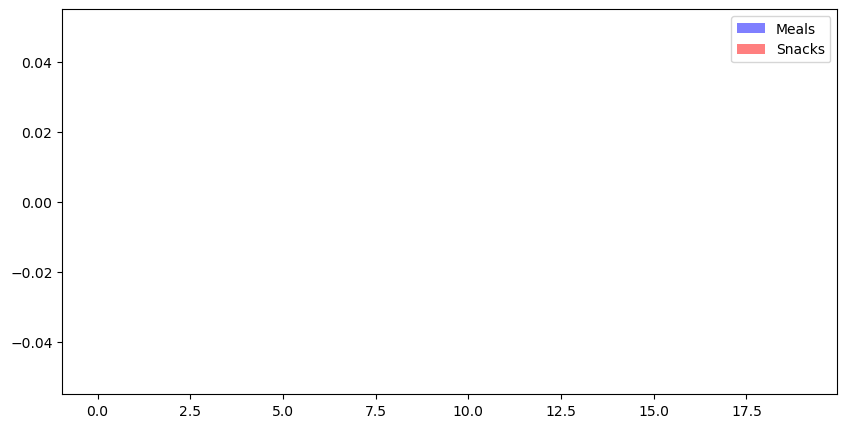

In [12]:
def get_FEDevents(filename, eventname):
    formats = ["%Y-%m-%d %H:%M:%S", "%m/%d/%Y %H:%M:%S"]  # Updated date formats
    file = open(filename)
    csvreader = csv.reader(file)
    next(csvreader)  # Skip header
    rows = [row for row in csvreader]

    if not rows:  # Check if rows is empty
        print(f"No data in file {filename}.")
        return [], None  # Return an empty list and None for refpoint

    # Assuming the first column contains the date and time info
    # and the "Event" column is consistent with the provided files
    event_column_index = 7  # Based on your CSV structure

    timestamps = []
    for row in rows:
        if row[event_column_index] == eventname:
            for date_format in formats:
                try:
                    date_time_obj = datetime.strptime(row[0], date_format)
                    timestamps.append(date_time_obj)
                    break
                except ValueError:
                    pass

    if not timestamps:  # If no events match, return an empty list and None for refpoint
        return [], None

    # Calculate time since "lights on", using the first event as reference if needed
    t0 = timestamps[0].strftime(date_format)
    day = t0.split()[0]
    lightson = day + " 07:00:00"  # Assuming lights on at 7 AM
    refpoint = datetime.strptime(lightson, date_format)

    pellettimes = [(t - refpoint).total_seconds() / 3600 for t in timestamps]

    return pellettimes, refpoint



# Initialize a dictionary to hold lists for each unique group
grouped_lists = {}

# Iterate through the rows to process and group data
for row in rows:
    mouse_id = row[1]
    sex = row[4]  # Assuming this is the correct column for SEX
    diet = row[2]  # Assuming this is the correct column for DIET
    mode = row[3]
    order = row[5]
    filename = f"../data/{row[0]}"

    # Create a unique key for each group
    group_key = f"{sex}_{diet}_{order}_{mode}"
    
    # Collect timestamps for this row's file and pellet event
    timestamps = get_FEDevents(filename, "Pellet")
    pellet_count = len(timestamps)
    
    # Initialize the list for this group if it doesn't exist
    if group_key not in grouped_lists:
        grouped_lists[group_key] = []
    
    # Append the data for this mouse to the list for its group
    grouped_lists[group_key].append({
        "MOUSEID": mouse_id,
        "SEX": sex,
        "ORDER": order,
        "diet": diet,
        "COUNT": pellet_count
    })



def get_all_meals(pellettimes, meal_threshold=5/60, min_pellets_for_meal=2):
    if not pellettimes:
        return (0, 0, 0, 0, 0, 0, [0]*24)

    IPIs = np.diff(np.array(pellettimes))
    meals = []
    snacks = []
    current_event = [pellettimes[0]]

    for i, ipi in enumerate(IPIs):
        if ipi <= meal_threshold:
            current_event.append(pellettimes[i + 1])
        else:
            if len(current_event) >= min_pellets_for_meal:
                meals.append(current_event)
            else:
                snacks.append(current_event)
            current_event = [pellettimes[i + 1]]

    # Handle the last sequence
    if current_event:
        if len(current_event) >= min_pellets_for_meal:
            meals.append(current_event)
        else:
            snacks.append(current_event)

    # nmeals = len(meals)
    # nsnacks = len(snacks)
    
    # hourly_meals = np.zeros(24)
    # for meal in meals:
    #     start_hour = int(meal[0]) % 24
    #     hourly_meals[start_hour] += 1

    # total_pellets = len(pellettimes)
    # mealsize = sum(len(meal) for meal in meals) / nmeals if nmeals else 0
    # snack_size = sum(len(snack) for snack in snacks) / nsnacks if nsnacks else total_pellets / nsnacks if nsnacks else 0
    # total_observation_period = max(pellettimes) - min(pellettimes)
    # meal_frequency = nmeals / total_observation_period if total_observation_period > 0 else 0
    # snack_frequency = nsnacks / total_observation_period if total_observation_period > 0 else 0

    return meals, snacks

all_meals= []
all_snacks= []

mouse_id = row[1]
if row[5] == 1 and row[3] == "FF" and row[2] == "NR":
        filename = f"../data/{row[0]}"
        pellettimes, refpoint = get_FEDevents(filename, "Pellet")
                
        meals,snacks = get_all_meals(pellettimes)
        all_meals.append(meals)
        all_snacks.append(snacks)
all_meals= tp.flatten_list(all_meals)
all_snacks= tp.flatten_list(all_snacks)






meal_size = [len(meal) for meal in all_meals]
snack_size = [len(snack) for snack in all_snacks]
meal_size
print(snack_size)
# plot the meals and snacks 
f , ax  = plt.subplots(1,figsize=(10,5))
ax.hist(meal_size, bins=range(0, 20), color='blue', alpha=0.5, label='Meals')
ax.hist(snack_size, bins=range(0, 20), color='red', alpha=0.5, label='Snacks')
ax.legend()

# get the average of snack_size
np.mean(snack_size)
len(meal_size)
np.mean(meal_size)

sum(meal_size)
np.mean(snack_size)
all_meals